In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [40]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

**Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?(pop-std is unknown)**

<p>Step - 1:</p>
<p> Bold claim in above problem is, on average each packet does not contain 500gms of biryani and pop-std is unknown hence we go with T-test.</p>
Hence
<p/> Alternate Hypothesis (Bold claim):</p>
<p> ${H_1}$: $\mu$$\not=$ 500gms</p>
<p/> Null Hypothesis (Status Quo):</p>
<p>${H_0}$:  $\mu$=500gms</p>

<p>Step - 2:</p>

* <p> Collect a sample of size n = 10 </p> <p>$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$</p>
* Compute sample mean          $\bar{x}$=465.3

<p> Step - 3: Compute Test Statistic:
<p>t=$\frac{{\bar{x}-\mu}} {\frac{S}{\sqrt n}}$
<p>$\bar{x}$= sample mean
<p>$\mu$=Population mean
<p>S=Standard deviation of sample
<p>n=sample size
<p>Step - 5.1: tailed t-test:</p>
<p> reject ${H_0}$ if points comes under critical zone
<p>Step - 5.2: Compute p-value

In [41]:
# two tailed test because μ≠500gms
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
#l = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4]
sample_mean=sum(l)/len(l)
print(sample_mean)

465.3


In [42]:
import math
numerator=0
for i in l:
  numerator+=(i-sample_mean)**2
  

sample_std1=numerator/(len(l)-1)
sample_std=math.sqrt(sample_std1)
print(sample_std)

86.84859110991827


In [43]:
# Two tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


In [44]:

# Defining the sample and population parameters
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = sample_std

In [45]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-1.2634751284446715


Text(465.3, 0.0007, 'x_bar')

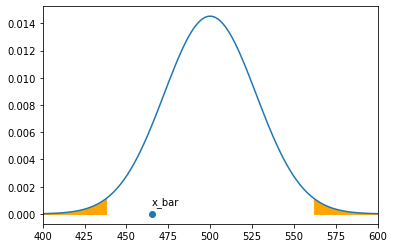

In [46]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [47]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [48]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818092
Fail to reject Null Hypothesis


**Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?**

<p>Step - 1:</p>
<p> Bold claim in above problem is, average rating given by the users is greater than 4 on a scale of 1 to 5 and pop-std is unknown hence we go with T-test.</p>
Hence
<p/> Alternate Hypothesis (Bold claim):</p>
<p> ${H_1}$: $\mu$$>$ 500gms</p>
<p/> Null Hypothesis (Status Quo):</p>
<p>${H_0}$:  $\mu$$<=500gms$</p>

<p>Step - 2:</p>

* <p> Collect a sample of size n = 20 </p> <p>$$ $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$ $$</p>
* Compute sample mean          $\bar{x}$=4.25

<p> Step - 3: Compute Test Statistic:
<p>t=$\frac{{\bar{x}-\mu}} {\frac{S}{\sqrt n}}$
<p>$\bar{x}$= sample mean
<p>$\mu$=Population mean
<p>S=Standard deviation of sample
<p>n=sample size
<p>Step - 5.1: tailed t-test:</p>
<p> reject ${H_0}$ if points comes under critical zone
<p>Step - 5.2: Compute p-value

In [49]:
# One Tail - Calculating the t-critical value
l = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

sample_mean=sum(l)/len(l)
print(sample_mean)

4.25


In [50]:
import math
numerator=0
for i in l:
  numerator+=(i-sample_mean)**2
  

sample_std1=numerator/(len(l)-1)
sample_std=math.sqrt(sample_std1)
print(sample_std)

0.8506963092234007


In [51]:
# One tail
from scipy.stats import t 
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [52]:
# Defining the sample and population parameters
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = sample_std

In [53]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

1.3142574813455419


Text(4.25, 0.1, 'x_bar')

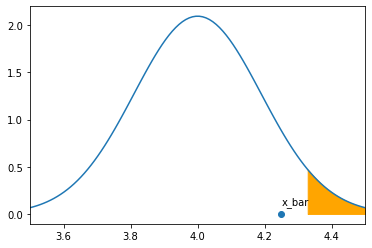

In [54]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [55]:
# Conclusion using t test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [56]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?**

Step - 1:

Bold claim in above problem is,  on average the SUV's mileage is at least 15 km/litre and pop-std is unknown hence we go with T-test.

Hence
Alternate Hypothesis (Bold claim):

H1 :  μ  >  15 km/litre

Null Hypothesis (Status Quo):

H0 :  μ  <=15 km/litre 

Step - 2:

Collect a sample of size n = 20

 
$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
 

<p>Compute sample mean $\bar{x}$ =4.25
<p> Step - 3: Compute Test Statistic:
<p>t=$\frac{{\bar{x}-\mu}} {\frac{S}{\sqrt n}}$
<p>$\bar{x}$= sample mean
<p>$\mu$=Population mean
<p>S=Standard deviation of sample
<p>n=sample size
<p>Step - 5.1: tailed t-test:</p>
<p> reject ${H_0}$ if points comes under critical zone
<p>Step - 5.2: Compute p-value

In [57]:
# One Tail - Calculating the t-critical value
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
print(min(l))
print(max(l))
sample_mean=sum(l)/len(l)
print(sample_mean)

13.23
16.98
15.098999999999998


In [58]:
import math
numerator=0
for i in l:
  numerator+=(i-sample_mean)**2
  

sample_std1=numerator/(len(l)-1)
sample_std=math.sqrt(sample_std1)
print(sample_std)

1.0253671999517255


In [59]:
# One tail
from scipy.stats import t 
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [60]:
# Defining the sample and population parameters
sample_size = 20
sample_mean = 15.098
pop_mean = 15
sample_std = sample_std

In [61]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

0.4274267049020058


Text(15.098, 0.1, 'x_bar')

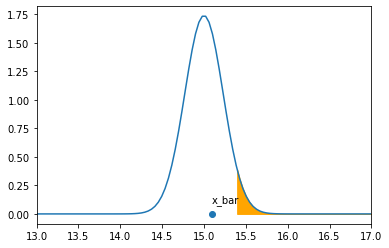

In [62]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the rejection region
# i.e. Reject the Null Hypothesis

In [63]:
# Conclusion using t test

if (np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [64]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33453427999566787
Fail to reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?**

Step - 1:

Bold claim in above problem is, on average it takes less than 100 ms to predict for any future datapoint and pop-std is unknown hence we go with T-test.

Hence
<p>Alternate Hypothesis (Bold claim):

H1 :  μ  <  100ms

Null Hypothesis (Status Quo):

H0 :  μ  >=100ms

Step - 2:

Collect a sample of size n = 100

<p>Compute sample mean $\bar{x}$ =97.5
<p> Step - 3: Compute Test Statistic:
<p>t=$\frac{{\bar{x}-\mu}} {\frac{S}{\sqrt n}}$
<p>$\bar{x}$= sample mean
<p>$\mu$=Population mean
<p>S=Standard deviation of sample
<p>n=sample size
<p>Step - 5.1: tailed t-test:</p>
<p> reject ${H_0}$ if points comes under critical zone
<p>Step - 5.2: Compute p-value

In [65]:
# One Tail - Calculating the t-critical value
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 8

In [67]:
# One tail
from scipy.stats import t 
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 99)

print(t_critical)

1.6603911559963895


In [70]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-3.125


Text(97.5, 0.1, 'x_bar')

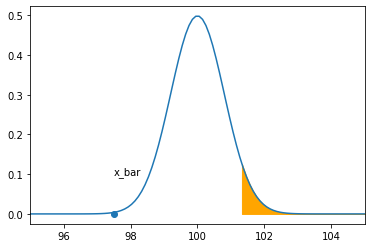

In [68]:

# Defining the x minimum and x maximum
x_min = 95
x_max = 105


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [71]:
# Conclusion using t test
if (np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [72]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0008890252991083925
Reject Null Hypothesis
